# Exploratory Analysis - Date Variables

This notebook contains only analysis fo the date variables in the data set.

### Imports

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

### Data

In [7]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

#### Copying alterations from main Exploratory file

In [9]:
#Dropping those properties with above ground living area
#greater than 4000
index_drop = train[train["GrLivArea"] > 4000].index
train.drop(index = index_drop, inplace = True)
train.reset_index(drop = True, inplace = True)

In [10]:
#Merging 4 and 3 car garage levels
train.loc[train["GarageCars"] == 4, "GarageCars"] = 3

In [11]:
#Merging 0 and 1 full bath levels
train.loc[train["FullBath"] == 0, "FullBath"] = 1

In [12]:
#Merging all levels of total above ground rooms less than three into one
train.loc[train["TotRmsAbvGrd"] < 3, "TotRmsAbvGrd"] = 3
#merging all levels of total above ground rooms greater than 10 into one
train.loc[train["TotRmsAbvGrd"] >= 10, "TotRmsAbvGrd"] = 10

## Date Variables

#### Month Sold

Text(0, 0.5, 'Sales Price')

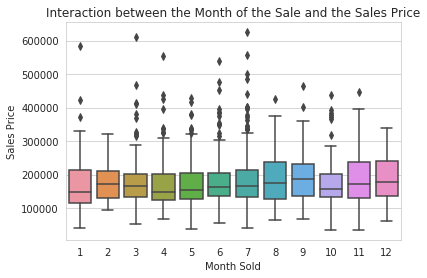

In [15]:
#Interaction between Month sold and sales price
sns.boxplot(train["MoSold"], train["SalePrice"])
plt.title("Interaction between the Month of the Sale and the Sales Price")
plt.xlabel("Month Sold")
plt.ylabel("Sales Price")

There is very very little variance in the relationship between sale price and the month in which the property was sold. It seems that the month of th eyear doesn't really effect the sale price.

In [21]:
train["SalePrice"].groupby(train["MoSold"]).describe()

,count,mean,std,min,25%,50%,75%,max
MoSold,,,,,,,,
1,56.0,173461.839286,96011.179979,39300.0,115750.0,147000.0,214500.0,582933.0
2,52.0,177882.000000,52960.863135,93000.0,129175.0,173250.0,211225.0,320000.0
3,106.0,183253.924528,86488.445599,52500.0,133725.0,165250.0,200593.0,611657.0
4,141.0,171503.262411,77147.323106,68400.0,124000.0,147000.0,202900.0,555000.0
5,204.0,172307.269608,68614.545198,37900.0,127750.0,154000.0,204812.5,430000.0
6,253.0,177395.735178,69453.085881,55993.0,136000.0,163000.0,204000.0,538000.0
7,233.0,183933.472103,84305.077431,40000.0,132500.0,164990.0,212900.0,625000.0
8,122.0,184651.827869,73215.986647,64500.0,126250.0,174450.0,237639.5,426000.0
9,63.0,195683.206349,83149.017391,67000.0,135000.0,185900.0,231585.0,465000.0


The majority of properties were sold between April and August, indicating that most properties are sold in the summer. This increase may be linked to families oving and selling/buying propetties, as most families with children move in the summer to avoid moving in the middle of the school year.

#### Year Sold

Text(0, 0.5, 'Sales Price')

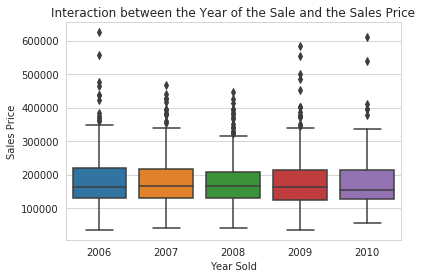

In [22]:
#Interaction between year sold and sales price
sns.boxplot(train["YrSold"], train["SalePrice"])
plt.title("Interaction between the Year of the Sale and the Sales Price")
plt.xlabel("Year Sold")
plt.ylabel("Sales Price")

There is practically no variance in the relationship between the sale price and the year in which the property was sold. I mentioned in the main file that it appeared that there may have been some sort of scaling done to account for market shifts/inflation in the data set, and this seems to be another indicator of this. One would expect at least some movement, but absolutely none is seen here.  
Whether by design or not, it does mean that the year will have no use in any predictive model I create.

In [20]:
train["SalePrice"].groupby(train["YrSold"]).describe()

,count,mean,std,min,25%,50%,75%,max
YrSold,,,,,,,,
2006,314.0,182549.458599,79426.838855,35311.0,131375.0,163995.0,218782.5,625000.0
2007,326.0,182607.444785,73857.085731,39300.0,129600.0,165000.0,217750.0,466500.0
2008,303.0,177418.135314,69843.803786,40000.0,131000.0,165000.0,207000.0,446261.0
2009,338.0,179432.103550,80879.237311,34900.0,125250.0,162000.0,212750.0,582933.0
2010,175.0,177393.674286,80451.280085,55000.0,128100.0,155000.0,213250.0,611657.0


When reviewing the number of sales per year, there are half as many observed in 2010 as there were in any other year. As year has no effect on the Sales price, this small anomoly isn't really that interesting, outside of having noticed it.

In conclusion, no date variable has an interesting effect on the sale price of a property. As such, they may bedropped from the data set when modeling.